In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from fbprophet import Prophet

data = pd.read_csv("IEX.BO.csv")
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-10-24,162.550003,162.699997,159.005005,159.990005,157.615845,601950
1,2017-10-25,160.024994,160.024994,154.500000,155.300003,152.995422,396380
2,2017-10-26,156.000000,158.699997,153.104996,155.449997,153.143204,251930
3,2017-10-27,155.539993,157.274994,155.100006,156.389999,154.069260,158670
4,2017-10-30,157.044998,158.000000,155.615005,156.115005,153.798325,113970


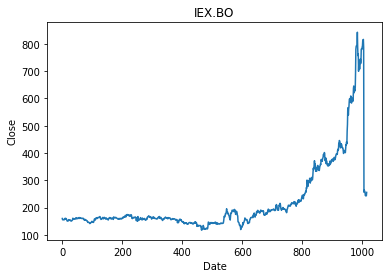

In [8]:
close = data['Close']
ax = close.plot(title='IEX.BO')
ax.set_xlabel('Date')
ax.set_ylabel('Close')
plt.show()

In [9]:
data["Date"] = pd.to_datetime(data["Date"], infer_datetime_format=True)
data = data[["Date", "Close"]]

In [10]:
data = data.rename(columns={"Date" : "ds", "Close" : "y" })

In [11]:
model = Prophet()
model.fit(data)
predict = model.make_future_dataframe(periods=365)
forcast = model.predict(predict)
forcast[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail()

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
1376,2022-11-29,996.345674,922.222016,1074.459275
1377,2022-11-30,995.771758,923.678282,1076.601666
1378,2022-12-01,997.407926,923.522076,1081.028358
1379,2022-12-02,995.522816,915.740345,1072.258264
1380,2022-12-03,996.419705,918.498349,1074.473574


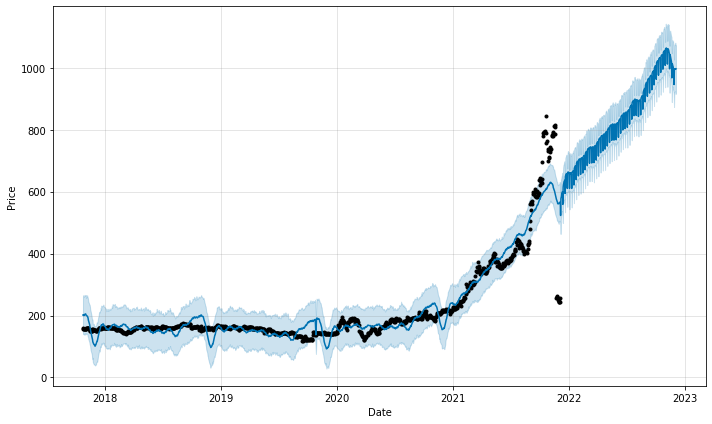

In [12]:
graph = model.plot(forcast, xlabel="Date", ylabel="Price")